### Rain in Australia
imports

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
import ipywidgets as widgets

pd.set_option("display.max_columns", None)


In [2]:
database = pd.read_csv('dades/weatherAUS.csv')

database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
database.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:>

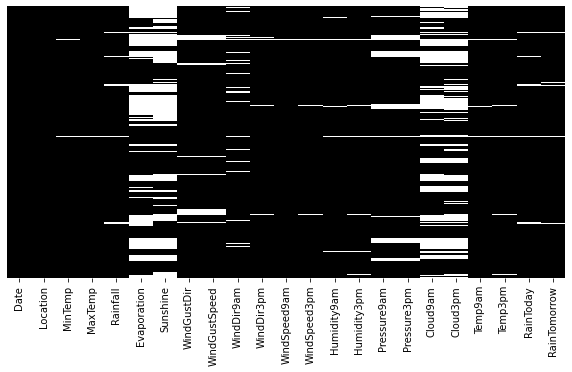

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(database.isnull(), yticklabels = False, cbar=False, cmap='gray')

In [5]:
# Checking data for NaN
missing = pd.DataFrame(database.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(database)).round(2)*100
missing



,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


In [6]:
database.duplicated().sum()

0

In [7]:
database['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [8]:
targetNulls = widgets.ToggleButtons(
    options=['No', 'Yes', 'Delete'],
    description='Optios:',
    disabled=False,
    tooltips=['No', 'Yes', 'Delete']
)
print("Tractaments de NULL target")
targetNulls

Tractaments de NULL target


ToggleButtons(description='Optios:', options=('No', 'Yes', 'Delete'), tooltips=('No', 'Yes', 'Delete'), value=…

In [9]:
if(targetNulls.value == 'No'):
    database['RainTomorrow'] = [1 if i=='Yes' else 0 for i in database['RainTomorrow'] ]
elif(targetNulls.value == 'Yes'):
    database['RainTomorrow']=[0 if i=='No' else 1 for i in database['RainTomorrow'] ]
else:
    database = database.dropna(axis=0, subset=['RainTomorrow'])

In [10]:
cols_to_drop=['Date']
database.drop(columns=cols_to_drop,inplace=True)

x=database.drop(['RainTomorrow'],axis=1)
y=database['RainTomorrow']
print(x.shape,y.shape)



(145460, 21) (145460,)


In [11]:
targetNulls = widgets.ToggleButtons(
    options=['mode', 'median', 'mean'],
    description='Optios:',
    disabled=False,
    tooltips=['mode', 'median', 'mean']
)
print("Tractaments de NULL no target")
targetNulls

Tractaments de NULL no target


ToggleButtons(description='Optios:', options=('mode', 'median', 'mean'), tooltips=('mode', 'median', 'mean'), …

In [12]:
categorical_cols = list(x.select_dtypes(include=['object']).columns)
for i in categorical_cols:
    x[i].fillna(x[i].mode()[0], inplace=True)

continuous_cols = list(x.select_dtypes(include=['float64']).columns)
if(targetNulls.value == 'mode'):
    x[column].fillna(x[column].mode(), inplace = True)
elif(targetNulls.value == 'median'):
    x[column].fillna(x[column].median(), inplace = True)
else:
    x[column].fillna(x[column].median(), inplace = True)
